In [1]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path

In [2]:
#CSV File to Load

train_data = Path("Resources/train.csv")

#Read the CSV File
train = pd.read_csv(train_data,delimiter = ";")

#Display the data
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Clean the Data by Making a New Dataframe with columns Age, Job, Marital, Education , Housing, Loan, Balance & last columns (Y)
train_df = train.loc[:,["age","job","marital","education","housing","loan","balance","y"]]
train_df.head()

#Drop the column name Default, Contact, Campaign,pdays, Previous,poutcome

,age,job,marital,education,housing,loan,balance,y
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [4]:
#Rename the columns name 

train_data_df = train_df.rename(columns={"age":"Age","job":"Job","marital":"Marital_Status","education":"Education",
                                         "housing":"Housing","loan":"Loan","balance":"Balance","y":"Outcome"})

train_data_df

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,825,yes
45207,71,retired,divorced,primary,no,no,1729,yes
45208,72,retired,married,secondary,no,no,5715,yes
45209,57,blue-collar,married,secondary,no,no,668,no


In [5]:
train_data_df.count()

Age               45211
Job               45211
Marital_Status    45211
Education         45211
Housing           45211
Loan              45211
Balance           45211
Outcome           45211
dtype: int64

In [6]:
#Cleaning the data by removing unknown category from Job and Education column

train_data_clean=train_data_df[train_data_df['Job']!='unknown'].loc[train_data_df['Education']!='unknown']
train_data_clean.reset_index()

,index,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,0,58,management,married,tertiary,yes,no,2143,no
1,1,44,technician,single,secondary,yes,no,29,no
2,2,33,entrepreneur,married,secondary,yes,yes,2,no
3,5,35,management,married,tertiary,yes,no,231,no
4,6,28,management,single,tertiary,yes,yes,447,no
...,...,...,...,...,...,...,...,...,...
43188,45206,51,technician,married,tertiary,no,no,825,yes
43189,45207,71,retired,divorced,primary,no,no,1729,yes
43190,45208,72,retired,married,secondary,no,no,5715,yes
43191,45209,57,blue-collar,married,secondary,no,no,668,no


In [7]:
#Selecting the Dataframe with Outcome No

outcome_no = train_data_clean[train_data_clean["Outcome"].isin(['no'])]
outcome_no

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
5,35,management,married,tertiary,yes,no,231,no
6,28,management,single,tertiary,yes,yes,447,no
...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,yes,yes,138,no
45198,37,management,married,tertiary,no,no,1428,no
45199,34,blue-collar,single,secondary,yes,no,1475,no
45209,57,blue-collar,married,secondary,no,no,668,no


In [8]:
# Get the dtype of DataFrame

outcome_no.dtypes

Age                int64
Job               object
Marital_Status    object
Education         object
Housing           object
Loan              object
Balance            int64
Outcome           object
dtype: object

In [9]:
# Description of the dataframe

outcome_no.describe()

,Age,Balance
count,38172.000000,38172.000000
mean,40.669679,1297.333176
std,10.083233,2974.636443
min,18.000000,-8019.000000
25%,33.000000,57.000000
50%,39.000000,413.000000
75%,48.000000,1339.000000
max,95.000000,102127.000000


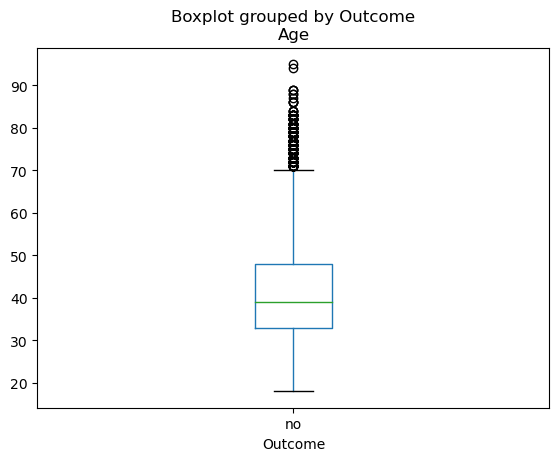

In [10]:
# Generate a Box Plot for Age

outcome_no.boxplot(by = 'Outcome', column=['Age'], grid = False)
plt.show()

Text(42.900000000000006, 5000.204999999999, 'Median: 39.00')

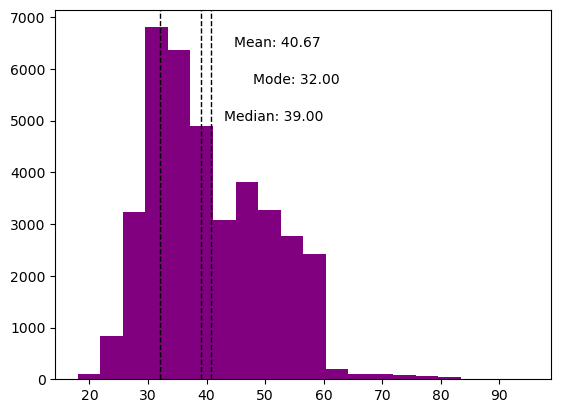

In [12]:
#Genrate Histogram for Age 

plt.hist(outcome_no['Age'], bins=20,color='purple')
plt.axvline(outcome_no['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Age'].mode().values[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Age'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(outcome_no['Age'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(outcome_no['Age'].mean()))
plt.text(outcome_no['Age'].mode()*1.5, max_ylim*0.8, 'Mode: {:.2f}'.format(outcome_no['Age'].mode().values[0]))
plt.text(outcome_no['Age'].median()*1.1, max_ylim*0.7, 'Median: {:.2f}'.format(outcome_no['Age'].median()))

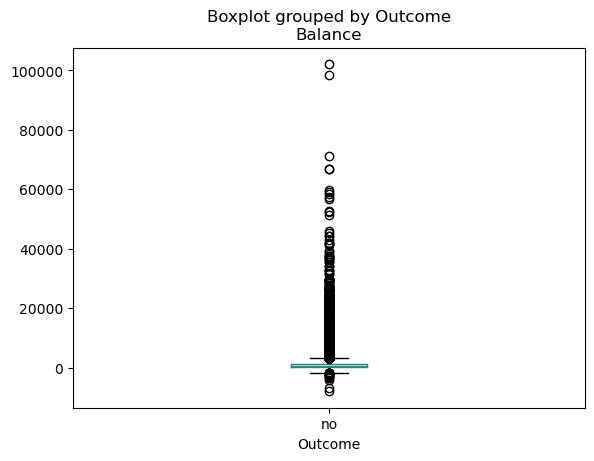

In [13]:
# Generate a Box Plot for Yearly_Balance

outcome_no.boxplot(by = 'Outcome', column=['Balance'], grid = False)
plt.show()

Text(5079.900000000001, 24763.62, 'Median: 39.00')

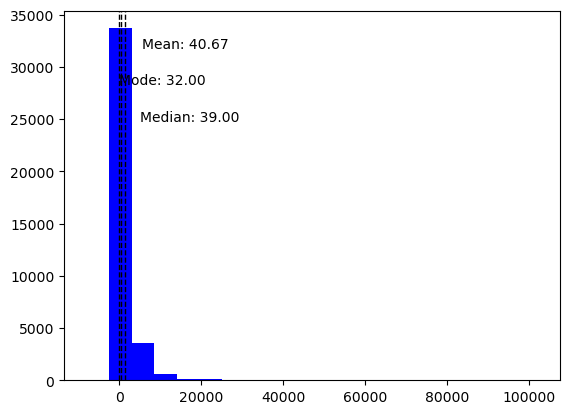

In [14]:
#Genrate Histogram for Yearly_Balance 

plt.hist(outcome_no['Balance'], bins=20,color='blue')
plt.axvline(outcome_no['Balance'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Balance'].mode().values[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(outcome_no['Balance'].median(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()

plt.text(outcome_no['Balance'].mean()*4.3, max_ylim*0.9, 'Mean: {:.2f}'.format(outcome_no['Age'].mean()))
plt.text(outcome_no['Balance'].mode()*4.9, max_ylim*0.8, 'Mode: {:.2f}'.format(outcome_no['Age'].mode().values[0]))
plt.text(outcome_no['Balance'].median()*12.3, max_ylim*0.7, 'Median: {:.2f}'.format(outcome_no['Age'].median()))

The correlation between customers purchasing a term deposit and  PearsonRResult(statistic=0.05138622847562193, pvalue=1.1796847529287694e-26)
The model details are LinregressResult(slope=5.414170974677023e-06, intercept=0.10891475242259137, rvalue=0.05138622847562198, pvalue=1.1796847528848868e-26, stderr=5.063076014850891e-07, intercept_stderr=0.0016859032197129762)


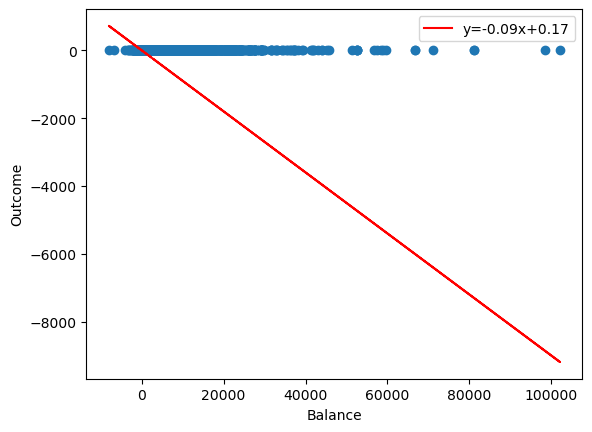

In [15]:
# Updates the values of the dataset from "yes" to 1 and from "no" to 0

train_data_clean_updated = train_data_clean.replace('yes',1)
train_data_clean_updated2 = train_data_clean_updated.replace('no',0)
train_data_clean_updated2

# Calculates pearsonr and model data
corr=st.pearsonr(train_data_clean_updated2['Balance'],train_data_clean_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and  {corr}")
model=st.linregress(train_data_clean_updated2['Balance'],train_data_clean_updated2['Outcome'])
print(f"The model details are {model}")

# Taking the values from above output
slope = -0.090
intercept = 0.167
line = slope*(train_data_clean_updated2['Balance'])+intercept

# Creates the graph
plt.scatter(train_data_clean_updated2['Balance'],train_data_clean_updated2['Outcome'])
plt.plot(train_data_clean_updated2['Balance'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Balance')
plt.ylabel('Outcome')
plt.legend()
plt.show()

In [16]:
# null hypothesis = there is no correlation between types of Marital_Status and the decision to select term deposit
# alternate hypothesis= there is some correlation between the type of Marital_Status and the 
#descision to select the term deposit

contingency_table = pd.crosstab(train_data_clean['Marital_Status'],train_data_clean['Outcome'])
contingency_table

Outcome,no,yes
Marital_Status,,
divorced,4430,598
married,23343,2603
single,10399,1820


In [17]:
# https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

st.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=191.58127409263932, pvalue=2.5041187079195114e-42, dof=2, expected_freq=array([[ 4443.51668094,   584.48331906],
       [22929.88938022,  3016.11061978],
       [10798.59393883,  1420.40606117]]))

In [18]:
# null hypothesis = there is no correlation between types of Education and the decision to select term deposit
# alternate hypothesis= there is some correlation between the type of Education and the 
#descision to select the term deposit

contingency_table = pd.crosstab(train_data_clean['Education'],train_data_clean['Outcome'])
contingency_table

Outcome,no,yes
Education,,
primary,6212,588
secondary,20690,2441
tertiary,11270,1992


In [19]:
# https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

st.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=233.40066357580014, pvalue=2.078212095907046e-51, dof=2, expected_freq=array([[ 6009.52932188,   790.47067812],
       [20442.12099183,  2688.87900817],
       [11720.34968629,  1541.65031371]]))